In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess
import classifiers
import feature_reduce
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Pickle load/save state

In [3]:
import pickle
def save_obj(obj, name ):
    with open('../preprocessed_objs/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('../preprocessed_objs/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Load Dataset

In [4]:
path_to_db='../ESC-50/'
df = pd.read_csv(path_to_db + 'meta/esc50.csv')

In [5]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


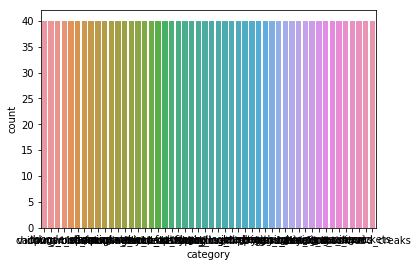

In [6]:
sns.countplot(df['category'])

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [6]:
start_time = time.time()
p1_data = preprocess.preprocess_fold(1, df, path_to_db + 'audio/', parallel=True)
print(time.time() - start_time)

51.4169020652771


In [7]:
p1_data.shape

(76998, 38)

In [8]:
p1_data.nbytes

23407392

## Background GMM
Used to compute p(a|background), the likelihood of observing an audio document a given background model.

In [9]:
start_time = time.time()
g = classifiers.gpu_train('gmm', 128, p1_data[:1000,:])
print(time.time() - start_time)

2.0082128047943115


In [10]:
g.get_weights()

array([0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 

In [11]:
g.get_means()

array([[ 5.88862534e+01, -8.91599751e+00,  1.12382345e+01, ...,
         3.13738495e-01, -4.10569876e-01, -5.00901461e-01],
       [ 5.31836662e+01, -1.23695469e+01,  1.09359493e+01, ...,
        -3.73867661e-01, -1.21500826e+00,  8.60476568e-02],
       [ 5.36127243e+01, -1.73425407e+01,  9.38786125e+00, ...,
        -4.94497828e-02,  1.87677070e-02, -8.99993703e-02],
       ...,
       [ 5.08814964e+01, -1.62882767e+01,  1.54820347e+01, ...,
         2.19070558e-02,  6.62545681e-01,  6.35063410e-01],
       [ 1.31254288e+02,  4.51385727e+01,  4.14578896e+01, ...,
        -1.28885806e-01, -1.10201985e-01, -4.07511145e-01],
       [ 5.69750481e+01, -4.66441631e+00,  1.54607172e+01, ...,
        -1.23295806e-01,  3.51951122e-01,  4.21334177e-01]], dtype=float32)

## Category GMM

In [32]:
category_processed = {}
for category in df.category.unique():
    start_time = time.time()
    category_processed[category] = preprocess.preprocess_fold(1, df[df['category'] == category], path_to_db + 'audio/', parallel=False)
    print(category)
    print("\tBytes: " + str(category_processed[category].nbytes))
    print("\tProcessing Time: " + str(time.time() - start_time))

dog
	Bytes: 377264
	Processing Time: 5.487398624420166
chirping_birds
	Bytes: 525312
	Processing Time: 6.01555871963501
vacuum_cleaner
	Bytes: 525312
	Processing Time: 5.8905723094940186
thunderstorm
	Bytes: 525312
	Processing Time: 6.151749610900879
door_wood_knock
	Bytes: 292144
	Processing Time: 5.4452080726623535
can_opening
	Bytes: 385168
	Processing Time: 5.268392562866211
crow
	Bytes: 481840
	Processing Time: 5.61478590965271
clapping
	Bytes: 524704
	Processing Time: 5.222418546676636
fireworks
	Bytes: 525312
	Processing Time: 5.825179576873779
chainsaw
	Bytes: 525312
	Processing Time: 5.826403617858887
airplane
	Bytes: 525312
	Processing Time: 5.531560659408569
mouse_click
	Bytes: 500688
	Processing Time: 6.238098382949829
pouring_water
	Bytes: 440192
	Processing Time: 5.703118324279785
train
	Bytes: 525312
	Processing Time: 5.634374141693115
sheep
	Bytes: 518320
	Processing Time: 5.597922325134277
water_drops
	Bytes: 440496
	Processing Time: 5.499744176864624
church_bells
	Byt

In [7]:
category_processed = load_obj("fold_1")

In [8]:
print(category_processed)

{'dog': array([[   0.        ,    0.        ,    0.        , ...,   -0.54666438,
           0.78128834,    2.63618784],
       [  83.62162117,  -50.48301012,  -31.11518603, ...,   -0.54666438,
           0.78128834,    2.63618784],
       [ 109.8483311 , -110.08382045,  -54.56891987, ...,   -0.54666438,
           0.78128834,    2.63618784],
       ...,
       [  18.01106892,  -14.06979483,  -24.66134997, ...,    0.19125159,
          -0.12727909,    0.25853477],
       [   5.8702227 ,   -7.60131763,   -9.13735141, ...,    0.19125159,
          -0.12727909,    0.25853477],
       [   1.49441683,   -2.58123416,   -2.54008395, ...,    0.19125159,
          -0.12727909,    0.25853477]]), 'chirping_birds': array([[-22.34895597, -52.70884129,   3.6648228 , ...,  -0.55413403,
         -0.41136898,   0.45133027],
       [-16.32526362, -47.03553919,  -0.52184903, ...,  -0.55413403,
         -0.41136898,   0.45133027],
       [-12.56049392, -50.99887933,  -4.61299789, ...,  -0.55413403,
       

In [9]:
categorical_gmms = {}
for category in df.category.unique():
    start_time = time.time()
    print(category)
    categorical_gmms[category] = classifiers.gpu_train('gmm', 128, category_processed[category])
    print("\tProcessing Time: " + str(time.time() - start_time))


dog
	Processing Time: 1.7299888134002686
chirping_birds
	Processing Time: 1.7501323223114014
vacuum_cleaner
	Processing Time: 1.608076572418213
thunderstorm
	Processing Time: 1.7901673316955566
door_wood_knock
	Processing Time: 1.591778039932251
can_opening
	Processing Time: 1.7198615074157715
crow
	Processing Time: 1.7042481899261475
clapping
	Processing Time: 1.539459466934204
fireworks
	Processing Time: 1.7229795455932617
chainsaw
	Processing Time: 1.5445659160614014
airplane
	Processing Time: 1.6361639499664307
mouse_click
	Processing Time: 1.8895785808563232
pouring_water
	Processing Time: 1.6325411796569824
train
	Processing Time: 1.6263806819915771
sheep
	Processing Time: 1.677638053894043
water_drops
	Processing Time: 1.6025996208190918
church_bells
	Processing Time: 1.8301646709442139
clock_alarm
	Processing Time: 1.4580297470092773
keyboard_typing
	Processing Time: 2.257838726043701
wind
	Processing Time: 1.5578701496124268
footsteps
	Processing Time: 1.7440228462219238
frog


In [37]:
import numpy as np
for key, value in test.items():
    if np.equal(value,category_processed[key]).all() == False:
        print("false")
        break
    
print("True")

True
